# TEORÍA CUÁNTICA BÁSICA, OBSERVABLES Y MEDIDAS

## Jose David Castillo
SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [20]:
import numpy as np

v1 = np.array([1+1j,2+1j])
norma = np.linalg.norm(v1)
posicion = 1
probabilidad = (v1[posicion]*(np.conj(v1[posicion])))/(norma**2)
print(probabilidad)

digite posicion 0


(0.2857142857142857+0j)


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [21]:
import numpy as np

v1 = np.array([1+1j,2+1j])
v2 = np.array([0+1j,1+1j])
norma1 = np.linalg.norm(v1)
norma2 = np.linalg.norm(v2)
v1 = v1/norma1
v2 = v2/norma2
product = np.vdot(v1,v2)
norma = (np.linalg.norm(product))**2
print(norma)

0.9523809523809527


COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [26]:
import numpy as np

v1 = np.array([1+1j,2+1j])
v2 = np.array([0+1j,1+1j])
norma1 = np.linalg.norm(v1)
norma2 = np.linalg.norm(v2)
v1 = v1/norma1
v2 = v2/norma2
v2 = v2.T.conjugate()
product = np.vdot(v2,v1)
norma = (np.linalg.norm(product))**2
print(norma)

0.761904761904762


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

In [18]:
import numpy as np

ket = np.array([[1], [0]])
observable = np.array([[1, 2+1j], [2-1j, 3]])
is_hermitian = np.allclose(matrix, matrix.conj().T)
if is_hermitian:
    media = np.dot(ket.conj().T, np.dot(observable, ket)).real
    varianza = np.dot(ket.conj().T, np.dot(observable ** 2, ket)).real - media ** 2
    print("LA matriz es hermitiana")
    print("La media es:",media.flatten(),", La varianza es", varianza.flatten())
else:
    print("la matriz no es hermitiana")

LA matriz es hermitiana
La media es: [1.] , La varianza es [0.]


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [19]:
import numpy as np

def eigenvalues_and_eigenvectors(observable):
    eigenvalues, eigenvectors = np.linalg.eigh(observable)
    return eigenvalues, eigenvectors
def transition_probabilities(observable, ket):
    eigenvalues, eigenvectors = eigenvalues_and_eigenvectors(observable)
    probabilities = np.abs(np.dot(eigenvectors.conj().T, ket)) ** 2
    return eigenvalues, probabilities
observable = np.array([[1, 2+1j], [2-1j, 3]])
eigenvalues, eigenvectors = eigenvalues_and_eigenvectors(observable)
print("Valores propios:", eigenvalues)
print("Vectores propios:")
print(eigenvectors)
ket = np.array([[1], [0]])
eigenvalues, probabilities = transition_probabilities(observable, ket)
for i, eigenvalue in enumerate(eigenvalues):
    print(f"Probabilidad de transitar al vector propio {i+1}: {probabilities[i]}")

Valores propios: [-0.44948974  4.44948974]
Vectores propios:
[[-0.83912106+0.j         -0.54394472+0.j        ]
 [ 0.48651894-0.24325947j -0.75053269+0.37526634j]]
Probabilidad de transitar al vector propio 1: [0.70412415]
Probabilidad de transitar al vector propio 2: [0.29587585]


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [20]:
import numpy as np

def evolve_system(initial_state, evolution_matrices):
    final_state = initial_state
    for matrix in evolution_matrices:
        final_state = np.dot(matrix, final_state)
    return final_state
initial_state = np.array([[1], [0]])  # Estado inicial
evolution_matrices = [
    np.array([[0, 1], [1, 0]]),
    np.array([[1, 0], [0, -1]])
]
final_state = evolve_system(initial_state, evolution_matrices)
print("Estado final:")
print(final_state)

Estado final:
[[ 0]
 [-1]]


4.3.1 Find all the possible states the system described in Exercise 4.2.2 can transition into after a measurement has been carried out.

In [2]:
import numpy as np

def calculate(estado):
    operador = np.array([[0, 1], [1, 0]]) 
    return np.dot(operador, estado)
def CalculateStates():
    e0 = np.array([1, 0])
    result = np.random.choice([0, 1], p=[1, 0])  
    if result == 0:
        return [np.array([0, 1])]  
        newState = calculate(e0)
        return [newState] 
CalculateStates()

[array([0, 1])]

4.3.2 Perform the same calculations as in the last example, using Exercise 4.3.1. Then draw the probability distribution of the eigenvalues as in the previous example.

Probabilidad p1: 0.5
Probabilidad p2: 0.5
Valor medio: 0.0


Text(0, 0.5, 'probabilidad')

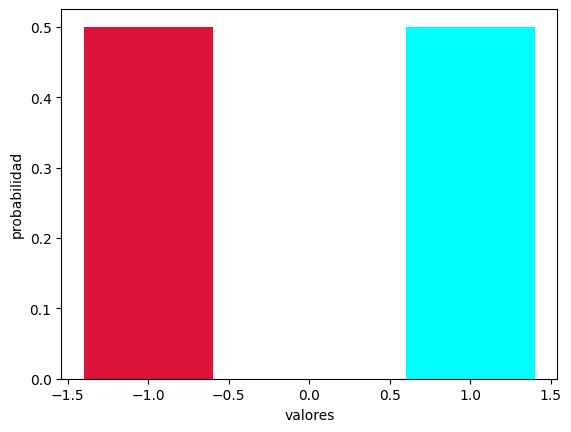

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_probabilidad(eigenvector):
    return np.linalg.norm(eigenvector)**2/2
def calcular_valor_medio(eigenvalues, probabilities):
    return sum(prob * eig_val for prob, eig_val in zip(probabilities, eigenvalues))
eigenvector1 = np.array([1, 0])
eigenvector2 = np.array([0, 1])
lambda1 = 1
lambda2 = -1
probabilidad1 = calcular_probabilidad(eigenvector1)
probabilidad2 = calcular_probabilidad(eigenvector2)
valor_medio = calcular_valor_medio([lambda1, lambda2], [probabilidad1, probabilidad2])
print("Probabilidad p1:", probabilidad1)
print("Probabilidad p2:", probabilidad2)
print("Valor medio:", valor_medio)
eigenvalues = [lambda1, lambda2]
probabilities = [probabilidad1, probabilidad2]
plt.bar(eigenvalues, probabilities, color=['cyan', 'crimson'])
plt.xlabel('valores')
plt.ylabel('probabilidad')

4.4.1 Exercise 4.4.1 Verify that
$$ 
    \begin{bmatrix} 0 && 1 \\
                   1 && 0 \\
    \end{bmatrix}
    \begin{bmatrix}  √2/2 && √2/2 \\
                   √2/2 && -√2/2 \\
    \end{bmatrix}$$
are unitary matrices. Multiply them and verify that their product is also unitary.

In [28]:
import numpy as np

def is_unitary(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False
    identity = np.eye(matrix.shape[0])
    product = np.dot(matrix, matrix.conj().T)
    return np.allclose(product, identity)
    
matrix1 = np.array([[0, 1], [1, 0]])
matrix2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])
producto = np.dot(matrix1,matrix2)
print("¿La matriz 1 es unitaria?", is_unitary(matrix1))
print("¿La matriz 2 es unitaria?", is_unitary(matrix2))
print("¿El producto entre ellas es unitario?", is_unitary(producto))

¿La matriz 1 es unitaria? True
¿La matriz 2 es unitaria? True
¿El producto entre ellas es unitario? True


4.4.2 Determine the state of the system after three time steps. What is the chance of the quantum ball to be found at point 3?

In [38]:
import numpy as np

m1 = np.array([[0,1/np.sqrt(2),1/np.sqrt(2),0], 
               [1j/np.sqrt(2),0,0,1/np.sqrt(2)], 
               [1/np.sqrt(2),0,0,1j/np.sqrt(2)],
               [0,1/np.sqrt(2),-1/np.sqrt(2),0]])

v1 = np.array([[1], [0], [0], [0]])
click1 = np.dot(m1, v1)
click2 = np.dot(m1, click1)
click3 = np.dot(m1, click2)

print("Result after one Click: ", click1)
print("Result after two Click: ", click2)
print("Result after one Click: ", click3)
norma = np.linalg.norm(click3)
probabilidad = (click3[2]*(np.conj(click3[2])))/(norma**2)
print("La probablidad es",probabilidad)

Result after one Click:  [[0.        +0.j        ]
 [0.        +0.70710678j]
 [0.70710678+0.j        ]
 [0.        +0.j        ]]
Result after two Click:  [[ 0.5+0.5j]
 [ 0. +0.j ]
 [ 0. +0.j ]
 [-0.5+0.5j]]
Result after one Click:  [[ 0.        +0.j        ]
 [-0.70710678+0.70710678j]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]]
La probablidad es [0.+0.j]


# Discución

4.5.2

El vector de estado genérico para un sistema de dos partículas con espín se puede representar como el producto tensorial de los vectores de estado de cada partícula. 
Si cada partícula puede estar en una superposición de sus estados de espín, el vector de estado genérico para el sistema se puede escribir como:
$$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle $$

Si tenemos $n$ partículas, podemos generalizar esto a:

$$ |\Psi\rangle = |\psi_1\rangle \otimes |\psi_2\rangle \otimes \ldots \otimes |\psi_n\rangle $$

Esto representa el estado de un sistema de \( n \) partículas, donde cada partícula puede estar en una superposición de sus estados de espín.
Cuando el estado del sistema no puede expresarse como un simple producto tensorial de los estados individuales de sus constituyentes, se produce el entrelazamiento. Esto implica que los estados de cada partícula están conectados de tal manera que la medición de una partícula puede afectar inmediatamente el estado de otra partícula, independientemente de la distancia entre ellas. El entrelazamiento es un componente esencial de la mecánica cuántica y es esencial para una variedad de procesos y usos cuánticos, como la computación cuántica, la comunicación cuántica y la criptografía cuántica.

4.5.3
El estado 
$$ |\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle $$

se puede simplificar de la siguiente manera:

$$ |\phi\rangle = |x_0\rangle \otimes |y_1\rangle + |x_1\rangle \otimes |y_1\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle $$

Como $$ |x_0\rangle + |x_1\rangle $$ es simplemente otro vector de estado en el espacio del primer sistema, este estado puede escribirse como el producto de dos estados individuales, uno para cada subsistema:

$$ |\phi\rangle = (|x_0\rangle + |x_1\rangle) \otimes |y_1\rangle = |\psi\rangle \otimes |y_1\rangle $$
Por lo tanto, este estado es separable.